# Image matching

**Setup**

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

import pivuq

## Load test data

**Load images**

In [3]:
parent_path = "./data/particledisparity_code_testdata/"
image_pair = np.array(
    [
        plt.imread(os.path.join(parent_path + ipath)).astype("float")
        for ipath in ["B00010.tif", "B00011.tif"]
    ]
)

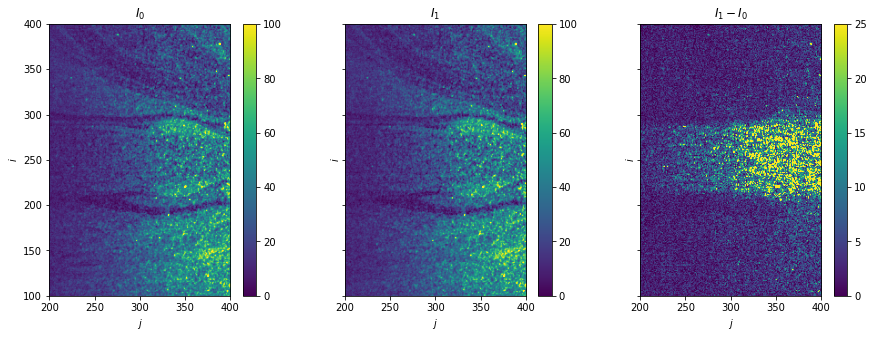

In [4]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for i, ax in enumerate(axes[:2]):
    im = ax.imshow(image_pair[i], vmax=100)
    fig.colorbar(im, ax=ax)
    ax.set(title=f"$I_{i}$")

ax = axes[-1]
im = ax.imshow(np.abs(image_pair[1] - image_pair[0]), vmin=0, vmax=25)
fig.colorbar(im, ax=ax)
ax.set(title="$I_1 - I_0$")

for ax in axes:
    ax.set(xlim=(200, 400), ylim=(100, 400), xlabel="$j$", ylabel="$i$")

**Load reference velocity**

In [5]:
data = np.loadtxt(os.path.join(parent_path + "B00010.dat"), skiprows=3).T

I, J = 128, 128
X = np.reshape(data[0], (I, J))
Y = np.reshape(data[1], (I, J))
U = np.stack((np.reshape(data[2], (I, J)), np.reshape(data[3], (I, J))))

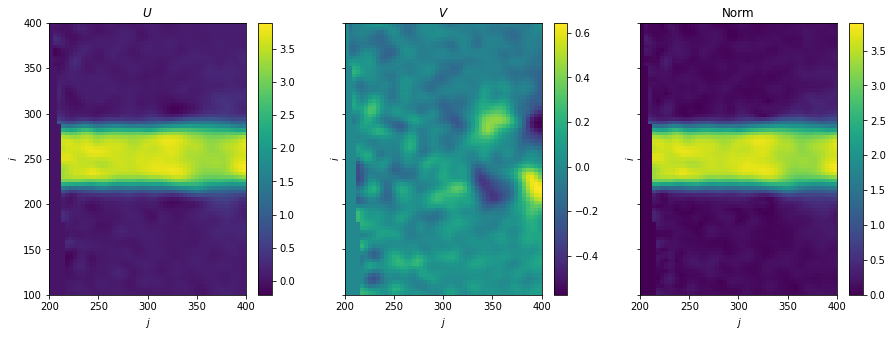

In [6]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for i, (ax, var) in enumerate(zip(axes[:2], ["U", "V"])):
    im = ax.pcolormesh(X, Y, U[i])
    fig.colorbar(im, ax=ax)
    ax.set(title=f"${var}$")

ax = axes[-1]
im = ax.pcolormesh(X, Y, np.linalg.norm(U, axis=0))
fig.colorbar(im, ax=ax)
ax.set(title="Norm")

for ax in axes:
    ax.set(xlim=(200, 400), ylim=(100, 400), xlabel="$j$", ylabel="$i$")

## Image matching

In [7]:
%%time
warped_image_pair = pivuq.warp(
    image_pair, U, direction="center", upsample_kind="linear", order=1, nsteps=5
)

CPU times: user 269 ms, sys: 17.3 ms, total: 287 ms
Wall time: 288 ms


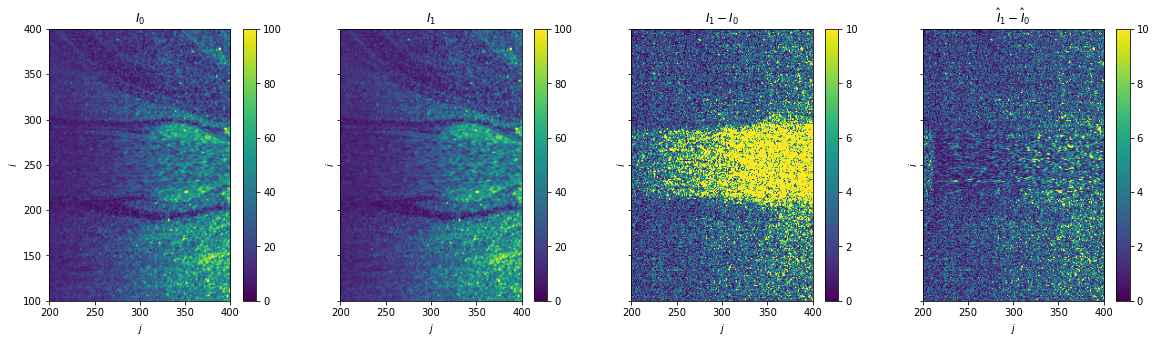

In [8]:
fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(20, 5))

for i, ax in enumerate(axes[:2]):
    im = ax.imshow(warped_image_pair[0], vmax=100)
    fig.colorbar(im, ax=ax)
    ax.set(title=f"$I_{i}$")

ax = axes[-2]
im = ax.imshow(np.abs(image_pair[1] - image_pair[0]), vmin=0, vmax=10)
fig.colorbar(im, ax=ax)
ax.set(title="$I_1 - I_0$")


ax = axes[-1]
im = ax.imshow(np.abs(warped_image_pair[1] - warped_image_pair[0]), vmin=0, vmax=10)
fig.colorbar(im, ax=ax)
ax.set(title="$\hat{I}_1 - \hat{I}_0$")

for ax in axes:
    ax.set(xlim=(200, 400), ylim=(100, 400), xlabel="$j$", ylabel="$i$")